In [2]:
# import mpld3
# mpld3.enable_notebook()
import numpy as np
import pandas as pd
from os import listdir
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from kneed import KneeLocator
%matplotlib inline

In [80]:
"""calculating DBSCAN and exporting the data with and without the outliers"""
def DBSCAN_Extractor():    
    folders = [f for f in listdir("3Ddata/")]
    # print(folders)
    for folder in folders:
        onlyfiles = [f for f in listdir("3Ddata/{}".format(folder)) ]
    #     print(onlyfiles)
        for file in onlyfiles:
            path = "3Ddata/{}/{}".format(folder, file)
            df = pd.read_csv(path)

            icedf = df[df.iceLabel == 1]

            clusterdf = icedf[['Points:0', 'Points:1', 'Points:2', 'd', 'T']]

            data = clusterdf[["Points:0","Points:1","Points:2"]].to_numpy()

            minimumPoints = icedf.origId.value_counts().max()

            neigh = NearestNeighbors(n_neighbors=3)
            nbrs = neigh.fit(data)
            distances, indices = nbrs.kneighbors(data)

            distances = np.sort(distances, axis=0)
            distances = distances[:,1]


            kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                          distances, # y values
                          S=1.0, #parameter suggested from paper
                          curve="concave", #parameter from figure
                          direction="increasing", #parameter from figure
                          online=True
                         ) 
            epsilon = kneedle.knee_y

            m = DBSCAN(eps=epsilon, min_samples=minimumPoints)
            m.fit(data)

            clusters = m.labels_
            clNum = len(set(m.labels_))

            print("{} time {} has {} clusters".format(folder, file, clNum))

            result = icedf.copy()
            result["cluster"] = clusters
            result = result.drop(columns=['Unnamed: 0'])
            result = result.reset_index()
            result = result.drop(columns=['index'])

            result.to_csv('output/withOutliers/{}/{}'.format(folder, file), index=False)
            print("exported with outliers")

            onlyClusters = list(range(clNum))

            withoutOutlier = result[result['cluster'].isin(onlyClusters)].copy()

            withoutOutlier.to_csv('output/withoutOutliers/{}/{}'.format(folder, file), index=False)
            print("exporter without outliers")
            
# DBSCAN_Extractor()

In [81]:
"""cleaning the without Outlier data 
set cluster label 0 to another cluster label
to have the same cluster numbber
0 will be 2
1 will be 3 a
"""

def changeClusterGroup() :    
    folders = [f for f in listdir("output/withoutOutliers/")]
    # print(folders)
    for folder in folders:
        onlyfiles = [f for f in listdir("output/withoutOutliers/{}".format(folder)) ]
    #     print(onlyfiles)
        for file in onlyfiles:
            print(file)
            path = "output/withoutOutliers/{}/{}".format(folder, file)
            df = pd.read_csv(path)
            
#             print(df.empty)

#             print(df['cluster'].value_counts())
            labels = sorted(df['cluster'].value_counts().index.tolist())
#             print(labels)

            newLabels = list(range(2, len(labels) + 2))
#             print(newLabels)
            df['cluster'] = df['cluster'].replace(labels,newLabels)
#             print(df['cluster'].value_counts())
            
#             df.to_csv('output/withoutOutliers/{}/{}'.format(folder, file), index=False)
#             print("exporter without outliers")
            
changeClusterGroup()

In [11]:
"""cleaning the with Outlier data 
set cluster label 0 and -1 to another cluster label
-1 will be 1
0 will be 2
1 will be 3 and so on
"""

def changeClusterGroup() :    
    folders = [f for f in listdir("output/withOutliers/")]
    # print(folders)
    for folder in folders:
        onlyfiles = [f for f in listdir("output/withOutliers/{}".format(folder)) ]
    #     print(onlyfiles)
        for file in onlyfiles:
#             print(file)
            path = "output/withOutliers/{}/{}".format(folder, file)
            df = pd.read_csv(path)
            
            df.head()
            
#             print(df.empty)

#             print(df['cluster'].value_counts())

            labels = sorted(df['cluster'].value_counts().index.tolist())
    
#             print(labels)

            newLabels = list(range(1, len(labels) + 1))
    
#             print(newLabels)

            df['cluster'] = df['cluster'].replace(labels,newLabels)

#             print(df['cluster'].value_counts())
            
            df.to_csv('output/withOutliers/{}/{}'.format(folder, file), index=False)

            print("exporter with outliers")
            
changeClusterGroup()

exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter with outliers
exporter wi

In [82]:
path = "3Ddata/contrails1/0.2.csv"

# path = "data/contrails1/0.2.csv"
df = pd.read_csv(path)

icedf = df[df.iceLabel == 1]

clusterdf = icedf[['Points:0', 'Points:1', 'Points:2', 'd', 'T']]

icedf.head()

,Unnamed: 0,origId,iceLabel,d,T,Points:0,Points:1,Points:2
7992,7992,5725,1,0.00001,241.9,4.7927,0.096746,-3.450600e-07
7993,7993,5725,1,0.00001,241.9,4.7927,0.095276,1.679943e-02
7994,7994,5725,1,0.00001,241.9,4.7927,0.090912,3.308876e-02
7995,7995,5725,1,0.00001,241.9,4.7927,0.083785,4.837270e-02
7996,7996,5725,1,0.00001,241.9,4.7927,0.074112,6.218687e-02


<IPython.core.display.Javascript object>


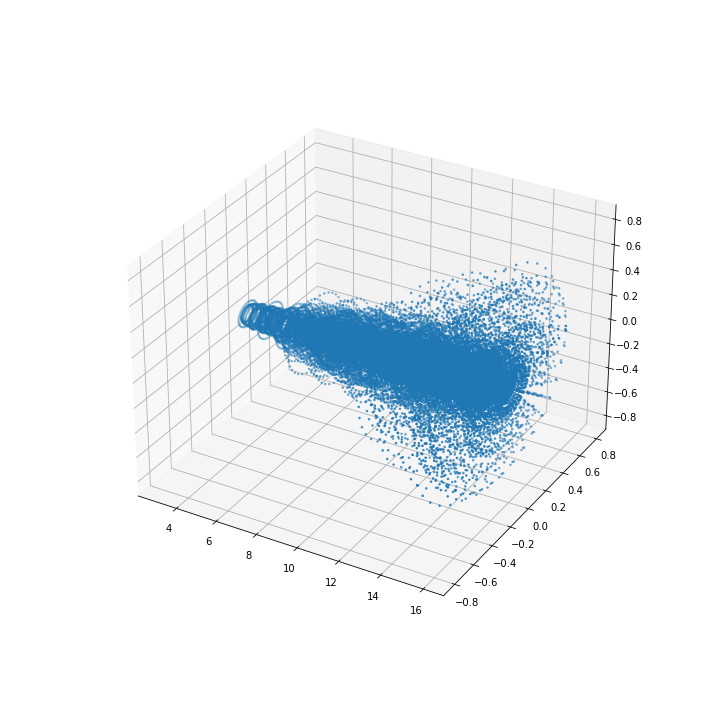

In [83]:
data = clusterdf[["Points:0","Points:1","Points:2"]].to_numpy()

# data = clusterdf[["d", "T"]].to_numpy()
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], s=2.5)
# ax.view_init(azim=200)
plt.show()

In [84]:
minimumPoints = icedf.origId.value_counts().max()

In [85]:
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [86]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

53428


<IPython.core.display.Javascript object>


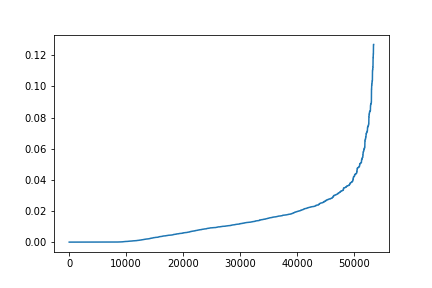

In [87]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
print(len(distances))
%matplotlib notebook
plt.plot(distances)

<IPython.core.display.Javascript object>


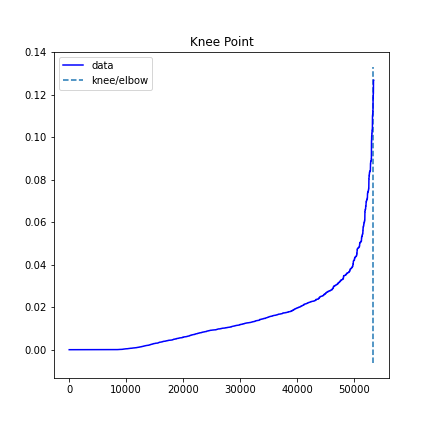

0.126912965856111


In [88]:
kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                      distances, # y values
                      S=1.0, #parameter suggested from paper
                      curve="concave", #parameter from figure
                      direction="increasing", #parameter from figure
                      online=True
                     ) 

kneedle.plot_knee()
print(kneedle.knee_y)
epsilon = kneedle.knee_y

In [92]:
m = DBSCAN(eps=epsilon, min_samples=minimumPoints)
m.fit(data)

DBSCAN(eps=0.126912965856111, min_samples=38)

In [93]:
clusters = m.labels_
print("number of cluster found: {}".format(len(set(m.labels_))))
print('cluster for each point: ', m.labels_)

# for c in clusters:
#     print(c)

number of cluster found: 6
cluster for each point:  [0 0 0 ... 4 4 4]


In [94]:
# colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
colors = ['red', 'yellow', 'orange', 'green', 'blue', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

<IPython.core.display.Javascript object>


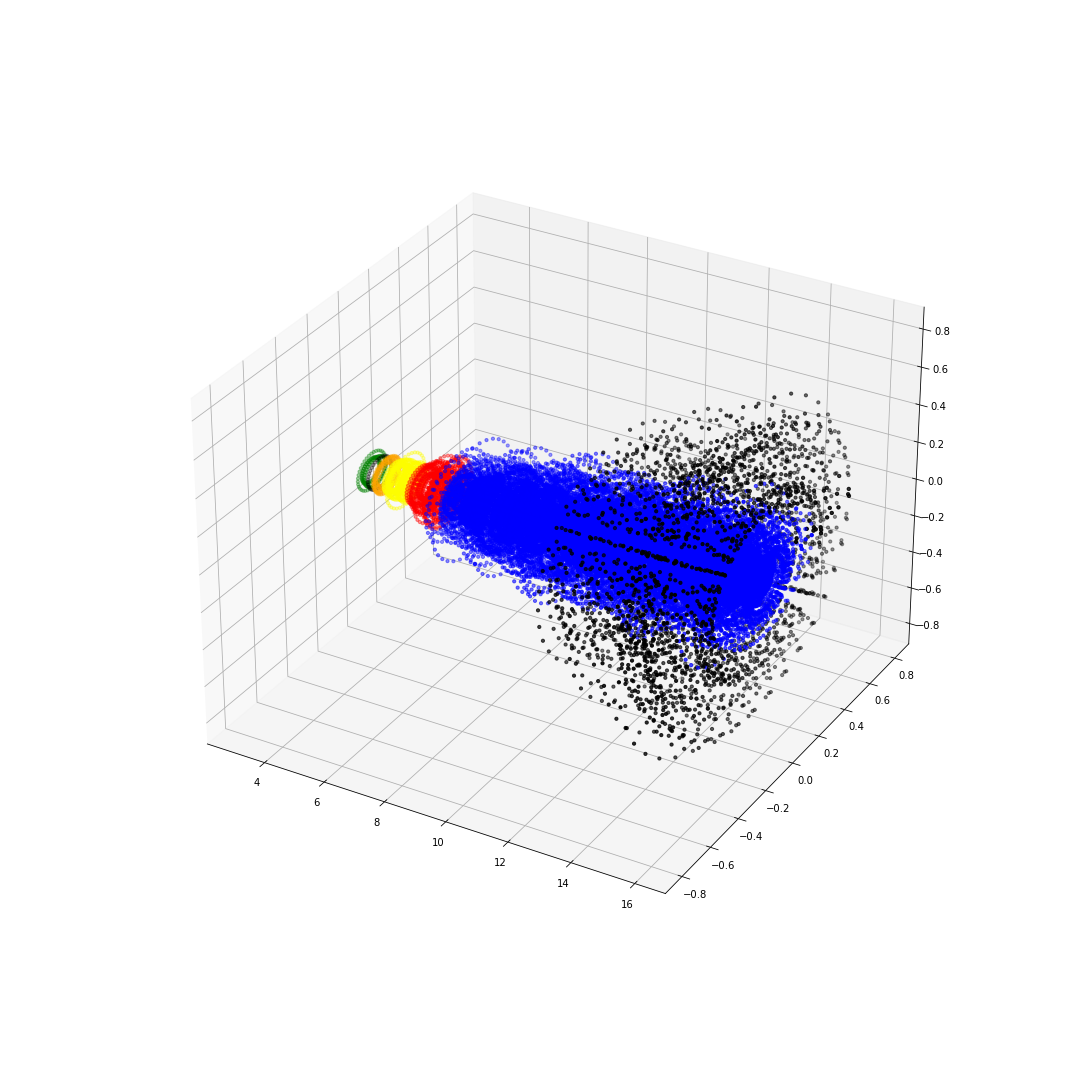

In [95]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=vectorizer(clusters), s=10)
# ax.view_init(0)
plt.show()

In [96]:
result = icedf.copy()
result["cluster"] = clusters
result

,Unnamed: 0,origId,iceLabel,d,T,Points:0,Points:1,Points:2,cluster
7992,7992,5725,1,0.00001,241.90,4.7927,0.096746,-3.450600e-07,0
7993,7993,5725,1,0.00001,241.90,4.7927,0.095276,1.679943e-02,0
7994,7994,5725,1,0.00001,241.90,4.7927,0.090912,3.308876e-02,0
7995,7995,5725,1,0.00001,241.90,4.7927,0.083785,4.837270e-02,0
7996,7996,5725,1,0.00001,241.90,4.7927,0.074112,6.218687e-02,0
...,...,...,...,...,...,...,...,...,...
84393,84393,5117,1,0.00001,211.18,9.0946,0.234620,5.500900e-07,4
84394,84394,5197,1,0.00001,211.23,9.1438,0.228800,-1.271500e-06,4
84395,84395,5085,1,0.00001,211.90,9.4986,0.224260,-2.101900e-07,4
84396,84396,5023,1,0.00001,213.78,10.5050,0.229150,-1.489200e-06,4


In [97]:
result = result.drop(columns=['Unnamed: 0'])
result = result.reset_index()
result = result.drop(columns=['index'])

In [98]:
# result.to_csv('0.2_test.csv', index=False)

In [99]:
withoutOutlier = result[result['cluster'].isin([0,1,2,3,4])].copy()
withoutOutlier['cluster'] = withoutOutlier['cluster'].replace([0],5)
withoutOutlier.cluster.value_counts()

4    47848
5     1444
1      912
2      228
3      190
Name: cluster, dtype: int64

In [100]:
# withoutOutlier.to_csv('0.2_without_outlier.csv', index=False)

In [12]:
path = "output/withoutOutliers/{}/{}".format("contrails1", "0.2.csv")
df = pd.read_csv(path)
            
df.head()

,origId,iceLabel,d,T,Points:0,Points:1,Points:2,cluster
0,5725,1,0.00001,241.9,4.7927,0.096746,-3.450600e-07,1
1,5725,1,0.00001,241.9,4.7927,0.095276,1.679943e-02,1
2,5725,1,0.00001,241.9,4.7927,0.090912,3.308876e-02,1
3,5725,1,0.00001,241.9,4.7927,0.083785,4.837270e-02,1
4,5725,1,0.00001,241.9,4.7927,0.074112,6.218687e-02,1


In [21]:
labels = sorted(df['cluster'].value_counts().index.tolist())
labels = [1*i for i in range(10)]
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
newLabels = list(range(2, len(labels) + 2))
newLabels

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]